In [1]:
import h5py
import numpy as np
from sdfs.geom_mrst import GeomMRST
from matplotlib import pyplot as plt, path as mpath, collections as mc, patches as mpatches, cm, ticker

In [2]:
plt.rc('text', usetex=True)
plt.rc('image', cmap='plasma')

def plot_patch(patches, values, fig, ax, points, title, cmin=None, cmax=None, cb=False):
    p = mc.PatchCollection(patches, cmap=cm.jet)
    p.set_array(values)
    p.set_clim([cmin, cmax])
    ax.add_collection(p)
    if points is not None:
        ax.plot(*points, 'ko', markersize=0.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.autoscale(tight=True)
    #ax.set_title(title)
    if cb:
        fig.colorbar(p, ax=ax)
    return p

In [3]:
resolution = '4x'
geom_filename = f'hanford_data/geom_{resolution}.mat'
Nuobs = 408
NYobs = 25
NYlearn = NYobs
NYrefobs = 50
NYxi = 1000
Nuxi = 1000
Nens = 5000
beta_ckli = 1e1
ugamma_ckli = 1e-3
Neumann_sd = 1
use_rand_init = False
lsq_method = 'trf'
ref = f"Yref=gpml_{NYrefobs}_{resolution}"
exp = f'NY={NYobs}_Nu={Nuobs}_{NYlearn=}_{Nuxi=}_{NYxi=}_beta={beta_ckli}_gamma={ugamma_ckli}_{Neumann_sd=}_{use_rand_init=}_{ref}'

In [4]:
geom = GeomMRST(geom_filename)

In [5]:
patches = [mpatches.Polygon(v, closed=True) for v in geom.nodes.coords.T[geom.cells.nodes.T, :]]

In [6]:
with h5py.File(f'hanford/gpml/hanford_david_{NYrefobs}_{resolution}.mat', 'r') as f:
    Yref = f.get('mu')[:].ravel()

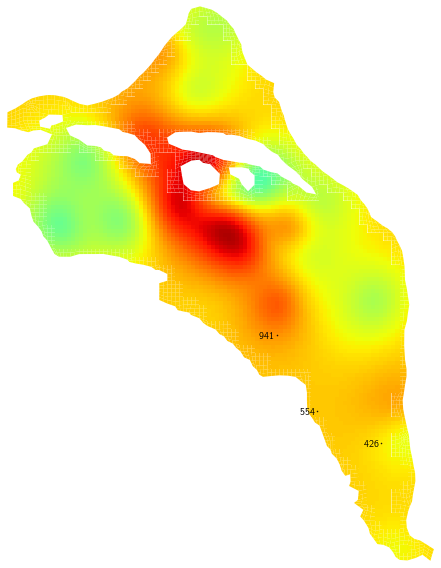

In [7]:
indices = [426, 554, 941]
fig, ax = plt.subplots(figsize=(8, 8))
p = plot_patch(patches, Yref, fig, ax, geom.cells.centroids[:, indices], 'Yref', 0, 12)
for i in indices:
    plt.annotate(i, geom.cells.centroids[:, i], textcoords="offset points", xytext=(-3, -3), ha='right')
fig.tight_layout()
fig.savefig(f'hanford/figures/location_{indices}.pdf', dpi=300)

In [8]:
Yref = np.loadtxt(f'hanford/results/YGPR/PICKLE_MAP/YGPR_{exp}.txt')
Ypickle = np.loadtxt(f'hanford/results/YPICKLE/YPICKLE_{exp}.txt')
Ymap = np.loadtxt(f'hanford/results/YMAP/PICKLE_MAP/YMAP_{exp}.txt')

print(Yref.shape)
print(Ypickle.shape)
print(Ymap.shape)

(5900,)
(5900,)
(5900,)


In [9]:
Ydiff_pickle = np.abs(Ypickle - Yref)
Ydiff_map = np.abs(Ymap - Yref)

np.savetxt(f'hanford/results/Ydiff/Ydiff_PICKLE_{exp}.txt', Ydiff_pickle)
np.savetxt(f'hanford/results/Ydiff/Ydiff_MAP_{exp}.txt', Ydiff_map)

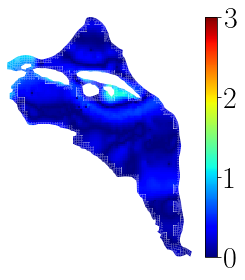

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
p = plot_patch(patches, Ydiff_pickle, fig, ax, None, 'Ypickle', 0, 3)
cbar = fig.colorbar(p, ax=ax)
cbar.ax.tick_params(labelsize='30')
fig.tight_layout()
#fig.savefig(f'hanford/figures/Yref/Ypickle_{ref}.pdf', dpi=300)

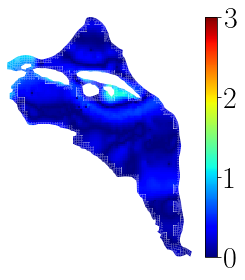

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
p = plot_patch(patches, Ydiff_map, fig, ax, None, 'Ymap', 0, 3)
cbar = fig.colorbar(p, ax=ax)
cbar.ax.tick_params(labelsize='30')
fig.tight_layout()
#fig.savefig(f'hanford/figures/Yref/Ymap_{ref}.pdf', dpi=300)